# Lab 1 - Jeffrey Gao
## A Little Statistics
### 1. Normal(Gaussian) Distribution:
A normal distribution is used to represent data which have values centered around an average. The average is equal to the median and mode in this distribution which is represented by the probability density function(pdf) $P(x) = \frac{1}{\sigma\sqrt{2\pi}}e^\frac{-{x-\mu}^2}{2\sigma^2}$ with mean $\mu$ and variance $\sigma^2$. The normal distribution is used for data that is centered around a value(mean = median = mode) with little to no bias. 

The normal distribution can be converted into a standard normal distribution where the mean $\mu=0$ so that the x-values display the deviation from the mean. The standard deviation $\sigma$ can also be described with z-scores $Z=\frac{x-\mu}{\sigma}$.

- In using a probability distribution function(pdf), we can show the distribution of probabilities for a range of measurements.
- The cumulative distribution function(cdf) takes a sigma and returns the probability associated with that standard deviation.
- The percent point function(ppf) takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at. 

Part 1
- https://www.quora.com/What-does-the-standard-deviation-metric-tell-us-for-a-non-normal-distribution
- https://www.mathsisfun.com/data/standard-normal-distribution.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
- https://matthew-brett.github.io/teaching/on_cdfs.html
- https://mathworld.wolfram.com/ExponentialDistribution.html
- https://opentextbc.ca/introstatopenstax/chapter/the-exponential-distribution/

Part 2
- http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Calcul_P_Value.pdf
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
- https://www.intmath.com/exponential-logarithmic-functions/7-graphs-log-semilog.php
- https://stattrek.com/probability-distributions/poisson.aspx
- https://online.stat.psu.edu/stat504/node/209/

In [3]:
from scipy import stats

# 1.B - Integrating standard normal distribution
# Returns a probability of measureing a value within a specified standard deviation
# By default, cdf computes a left-tailed test ranging from -inf to x

print("  cdf1: ", stats.norm.cdf(1))
print("  cdf2: ", stats.norm.cdf(2))
print("  cdf3: ", stats.norm.cdf(3))

# 1.C - For a given probability determine the associated 'sigma' value
# Here, ppf is taking a probability and returning a sigma
# ppf is the inverse of cdf so inputting the return value of cdf into ppf will give us the sigma we started with

print("\n  ppf1: ", stats.norm.ppf(stats.norm.cdf(1)))
print("  ppf2: ", stats.norm.ppf(stats.norm.cdf(2)))
print("  ppf3: ", stats.norm.ppf(stats.norm.cdf(3)))

  cdf1:  0.8413447460685429
  cdf2:  0.9772498680518208
  cdf3:  0.9986501019683699

  ppf1:  1.0
  ppf2:  2.0000000000000004
  ppf3:  2.9999999999999982


Looking at the sigmas produced from the percent point function, we notice positive sigmas representing an integral over the range from a value to $+\infty$. A negative sigma would indicate an integral over the range of $-\infty$ to a value. In a non-gaussian distribution, a negative sigma would represent 

### 2. Exponential Distribution
In an exponential distribution, it can be shown that the mean is equal to its sigma $\mu=\sigma=\frac{1}{\lambda}$ where lambda is the rate parameter and set to 1 for this example. The distribution only exists on the interval from 0 to $\infty$.

Typically, the exponential distribution is applied to durations such as the time before an earthquake occurs or the time until a piece of equipment fails.

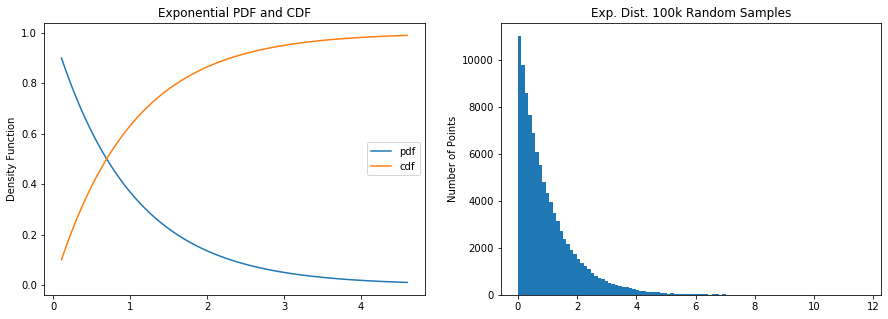

In [24]:
import numpy as np
import matplotlib.pyplot as plt

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

x = np.linspace(stats.expon.ppf(0.1), stats.expon.ppf(0.99), 100)
# histogram
ax1.plot(x, stats.expon.pdf(x))  # probability density
ax1.plot(x, stats.expon.cdf(x))  # cumulative distribution
ax1.set_title('Exponential PDF and CDF')
ax1.set_ylabel('Density Function')
ax1.legend(['pdf','cdf'])

# rcb random values from dist.
# realizations
rvs = stats.expon.rvs(size = 100000)
ax2.hist(rvs, 100);
ax2.set_title('Exp. Dist. 100k Random Samples')
ax2.set_ylabel('Number of Points');

### 3. Hypothetical Measurement(s) on Signal-free Data

Assume we want to know the proability of measuring a value greater than or equal to 0.4 exponential probability distribution. With an integral, the probability would be $P = \int_{0.4}^{\infty} e^{-x}dx$ with $\lambda = 1$.

Probability:  0.6703200460356393
Sigma:  0.4891743762340093


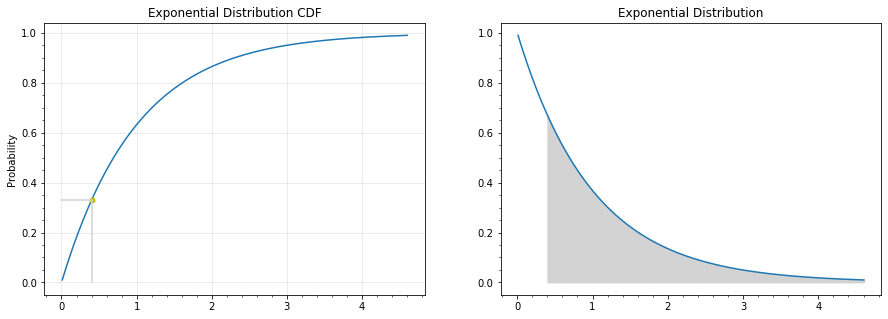

In [5]:
fig2, (ax3,ax4) = plt.subplots(1,2,figsize=(15,5))

### Plotting probability and probability density
x = np.linspace(stats.expon.ppf(0.01), stats.expon.ppf(0.99), 100000)
ax3.plot(x, stats.expon.cdf(x))
ax3.plot(0.4, stats.expon.cdf(0.4), 'y.', markersize=10)
ax3.plot([0.4, 0.4, 0], [0, stats.expon.cdf(0.4), stats.expon.cdf(0.4)], 'lightgray')
ax3.set_title('Exponential CDF')
ax3.set_ylabel('Probability')
ax3.minorticks_on()
ax3.grid(alpha=0.3)

ax4.plot(x, stats.expon.pdf(x))
ax4.fill_between(x, stats.expon.pdf(x), where=x >= 0.4, color='lightgray')
ax4.set_title('Exponential Distribution')
ax4.minorticks_on()

### Output probability and sigma
print("Probability: ", 1-stats.expon.cdf(0.4))  # Subtract cdf from 1 as it ranges from [inf,x]
print("Sigma: ", 1-stats.expon.ppf(0.4))

Looking at a few other hypothetical measurement values:

In [6]:
# Probability of measuring a value greater than or equal to x?
##### distribution on semi-log axes

measure = np.linspace(0.05, 0.95, 10)

for n in measure:
    print("\nMeasured value: {0:0.2f}".format(n))
    print("Probability: {0:0.5f}".format(1-stats.expon.cdf(n)))
    print("Sigma:       {0:0.5f}".format(1-stats.expon.ppf(n)))


Measured value: 0.05
Probability: 0.95123
Sigma:       0.94871

Measured value: 0.15
Probability: 0.86071
Sigma:       0.83748

Measured value: 0.25
Probability: 0.77880
Sigma:       0.71232

Measured value: 0.35
Probability: 0.70469
Sigma:       0.56922

Measured value: 0.45
Probability: 0.63763
Sigma:       0.40216

Measured value: 0.55
Probability: 0.57695
Sigma:       0.20149

Measured value: 0.65
Probability: 0.52205
Sigma:       -0.04982

Measured value: 0.75
Probability: 0.47237
Sigma:       -0.38629

Measured value: 0.85
Probability: 0.42741
Sigma:       -0.89712

Measured value: 0.95
Probability: 0.38674
Sigma:       -1.99573


We see that as the value being measured increases, the probability of measuring a value greater than or equal to the target value decreases. Since the mean is equal to the sigma in an exponential distribution, the decreasing sigma indicates the calculated probability is falling under the mean.

## Non-continuous Distributions

### 1. Poisson Distribution

In statistics, a Poisson distribution is a statistical distribution that shows how many times an event is likely to occur within a specified period of time. It is used for independent events which occur at a constant rate within a given interval of time. The Poisson distribution is a discrete function, meaning that the event can only be measured as occurring or not as occurring. The probability mass function is $f(k) = e^{-\mu}(\frac{\mu^k}{k!})$ where k is the number of occurrences and can only be an integer. The average rate at which events occur are independent oc other occurrences and two events cannot occur at the same time.

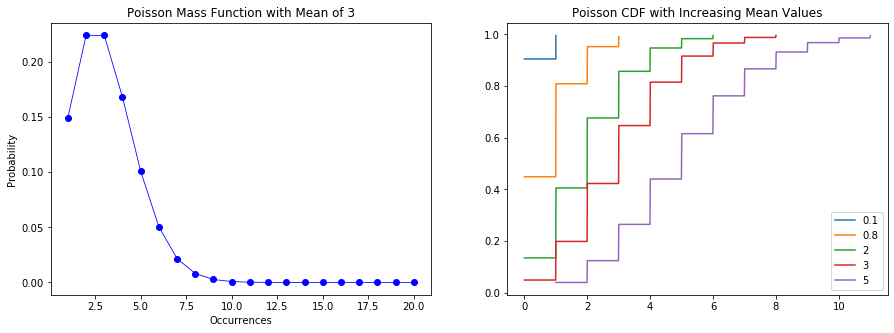

In [146]:
fig3, (ax5,ax6) = plt.subplots(1,2,figsize=(15,5))

x = np.linspace(1, 20, 20)
ax5.plot(x, stats.poisson.pmf(x, 3), 'b-o', linewidth=0.8);
ax5.set_title('Poisson Mass Function with Mean of 3')
ax5.set_xlabel('Occurrences')
ax5.set_ylabel('Probability')

mu = [0.1, 0.8, 2, 3, 5]

for n in mu:
    x = np.linspace(stats.poisson.ppf(0.01, n), stats.poisson.ppf(0.99, n), 1000)
    ax6.plot(x, stats.poisson.cdf(x, n));
ax6.set_title('Poisson CDF with Increasing Mean Values')
ax6.legend(['0.1','0.8','2','3','5']);

Here the Poisson distribution is only defined at integer values of event occurrences. There are discontinuities where there are integers and everywhere else is flat.

Take for example, find the probability of measuring 6, 7, and 8 occurrences whe the mean is 5:

Probability of finding 6, 7, or 8 occurrences:  0.315945710445088
Sigma:  2.23606797749979


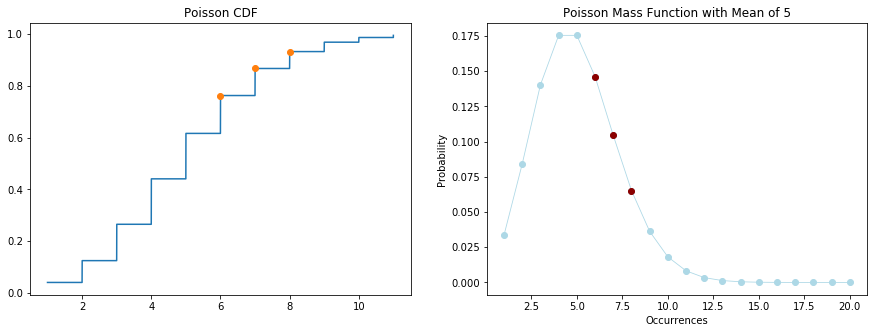

In [142]:
fig4, (ax7,ax8) = plt.subplots(1,2,figsize=(15,5))

mu = 5

# Probability, Standard deviation is sqrt(mu)
x = np.linspace(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu), 100000)
prob = stats.poisson.pmf(8, mu) + stats.poisson.pmf(7, mu) + stats.poisson.pmf(6, mu)
print("Probability of finding 6, 7, or 8 occurrences: ", prob)
print("Sigma: ", np.sqrt(mu))

# CDF
ax7.plot(x, stats.poisson.cdf(x, mu)); 
ax7.plot([6, 7, 8], [stats.poisson.cdf(6, mu), stats.poisson.cdf(7, mu), stats.poisson.cdf(8, mu)], 'o')
ax7.set_title('Poisson CDF')

# Poisson mass function
x = np.linspace(1, 20, 20)
ax8.plot(x, stats.poisson.pmf(x, mu), '-o', c='lightblue', linewidth=0.8);
ax8.plot([6, 7, 8], [stats.poisson.pmf(6, mu), stats.poisson.pmf(7, mu), stats.poisson.pmf(8, mu)], 'o', c='darkred')
ax8.set_title('Poisson Mass Function with Mean of 5')
ax8.set_xlabel('Occurrences');
ax8.set_ylabel('Probability');

Probabilities and sigmas are discrete because these values are dependent on the input values which are integers. In running experiments with a Poisson distribution, there will only be two outcomes: success and failure. The mean of the Poisson distribution can be non-discrete as averages can lie between values depending on the data. The probabilities will still be discrete even with non-discrete means but the  will be continuous.

Looking at the differences between the standard Gaussian distribution and those of the exponential or Poisson, we see specific applications for which these distributions will fit the data. The Poisson distribution deals with the number of occurrences in a fixed period of time, and the exponential distribution deals with the time between occurrences of successive events with "continuous" time.